## Experiment 10 - Working with the Iris Dataset and Performing a Comparative Analysis of Models

## Importing Libraries

In [97]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Loading Data

Loading the dataset from `sklearn`.

In [29]:
iris = load_iris()

Converting the dataset to a `pandas` dataframe.

In [30]:
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

Displaying the dataset.

In [31]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


## Exploratory Data Analysis

### Explore the features

Analysing the shape of the dataset.

In [32]:
data.shape

(150, 5)

Get the list of columns of the dataset.

In [33]:
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

Here's information about all the columns and the type of data they contain. 

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


### Check for null values in the dataset

In [ ]:
data.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

### Check if the dataset if balanced

Check the count of each label in the target column.

In [35]:
data['target'].value_counts()

0.0    50
1.0    50
2.0    50
Name: target, dtype: int64

Normalize the `value_counts()` to get the probabilities of each class in the target column.

In [36]:
data['target'].value_counts(normalize=True)

0.0    0.333333
1.0    0.333333
2.0    0.333333
Name: target, dtype: float64

Visualising the same in the form of a bar graph.

<AxesSubplot: >

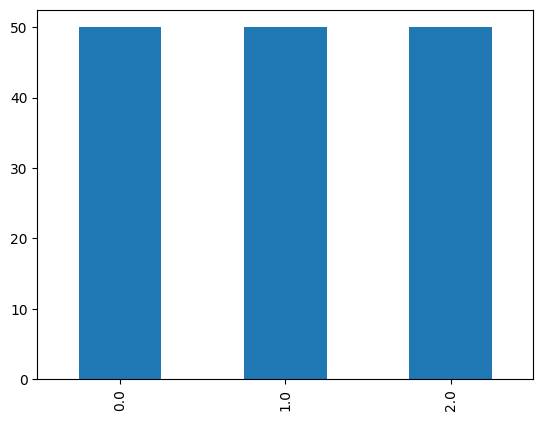

In [37]:
data['target'].value_counts().plot.bar()

**It's apparent that the data is evenly distributed among the three classes. It's as balanced as it can get!**

### Plotting a correlation heatmap between all the features in the dataset

<AxesSubplot: >

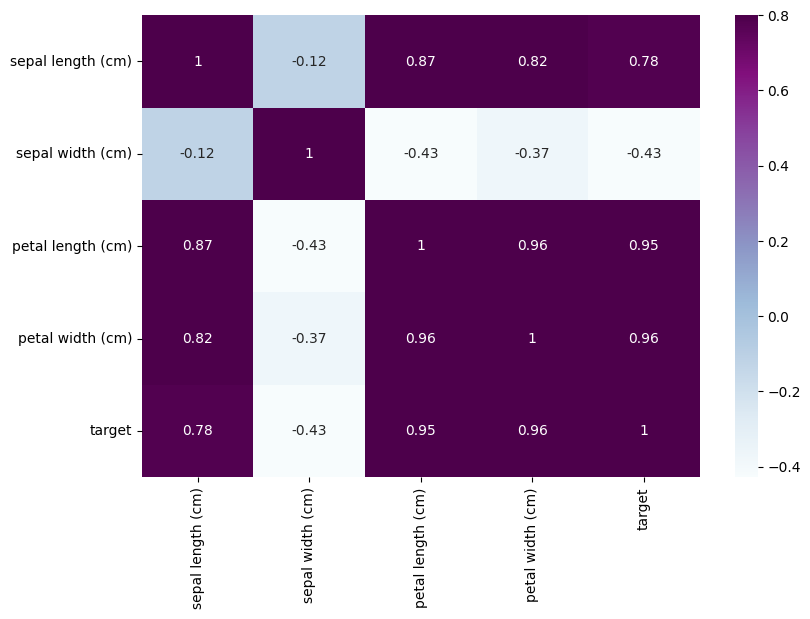

In [38]:
matrix = data.corr()

f, ax = plt.subplots(figsize=(9,6))

sns.heatmap(matrix, vmax=.8, cmap="BuPu", annot = True)

## Preparing to Train the Models

Extracting `X` and `y` from our dataset.

In [49]:
X = data.iloc[:, :-1]
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [51]:
y = data['target']
y, y.shape

(0      0.0
 1      0.0
 2      0.0
 3      0.0
 4      0.0
       ... 
 145    2.0
 146    2.0
 147    2.0
 148    2.0
 149    2.0
 Name: target, Length: 150, dtype: float64,
 (150,))

Performing a train-test split.

In [53]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42)

## Model Training

In [75]:
def scoreClassifier(clf, test):
    y_predicted = clf.predict(test)
    
    accuracy = accuracy_score(y_test, y_predicted)
    
    return accuracy

### Model 1 - Logistic Regression Classifier


In [72]:
LogisticRegressionClassifier = LogisticRegression(random_state=24).fit(X_train, y_train)

/home/volt/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [77]:
LogisticRegressionAccuracy = scoreClassifier(clf=LogisticRegressionClassifier, test=X_test)
LogisticRegressionAccuracy

1.0

### Model 2 - K-Nearest Neighbours Classifier

In [83]:
neighbours = 3

KNNClassifier = KNeighborsClassifier(n_neighbors=neighbours).fit(X_train, y_train)

In [85]:
KNNAccuracy = scoreClassifier(clf=KNNClassifier, test=X_test)
KNNAccuracy

1.0

### Model 3 - Linear Support Vector Machine Classifier

In [88]:
SVMClassifier = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5)).fit(X_train, y_train)

In [91]:
SVMAccuracy = scoreClassifier(clf=SVMClassifier, test=X_test)
SVMAccuracy

1.0

**It's apparent that the three classifiers that I'd implemented fit the iris dataset perfectly. This is because the dataset isn't complex enough.**

## Gridsearch CV

This gives us an optimised set of parameters us to then train our machine learning model. For this example, we'll use the linear SVM. The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid

In [95]:
parameterList = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

In [99]:
supportVectorClassifier = svm.SVC()
SVMClassifierWithGridsearch = GridSearchCV(supportVectorClassifier, parameterList).fit(X_train, y_train)

In [100]:
scoreClassifier(clf=SVMClassifierWithGridsearch, test=X_test)

1.0

## Conclusion

The iris datasets is one of the most popular datasets out there for machine learning. However, due to it's low number of features and the few number of data points, it's an extremely easy dataset to map to any of the robust machine learning algorithms of today. Hence, all the classifiers we implemented in this notebook were able to achieve `100%` on all counts.